In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSet/Spotify_Song_Attributes.csv')

In [32]:
df.shape

(10080, 22)

In [33]:
df.isnull().sum()

trackName              0
artistName             0
msPlayed               0
genre               1500
danceability         550
energy               550
key                  550
loudness             550
mode                 550
speechiness          550
acousticness         550
instrumentalness     550
liveness             550
valence              550
tempo                550
type                 550
id                   550
uri                  550
track_href           550
analysis_url         550
duration_ms          550
time_signature       550
dtype: int64

In [34]:
df.count()

trackName           10080
artistName          10080
msPlayed            10080
genre                8580
danceability         9530
energy               9530
key                  9530
loudness             9530
mode                 9530
speechiness          9530
acousticness         9530
instrumentalness     9530
liveness             9530
valence              9530
tempo                9530
type                 9530
id                   9530
uri                  9530
track_href           9530
analysis_url         9530
duration_ms          9530
time_signature       9530
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trackName         10080 non-null  object 
 1   artistName        10080 non-null  object 
 2   msPlayed          10080 non-null  int64  
 3   genre             8580 non-null   object 
 4   danceability      9530 non-null   float64
 5   energy            9530 non-null   float64
 6   key               9530 non-null   float64
 7   loudness          9530 non-null   float64
 8   mode              9530 non-null   float64
 9   speechiness       9530 non-null   float64
 10  acousticness      9530 non-null   float64
 11  instrumentalness  9530 non-null   float64
 12  liveness          9530 non-null   float64
 13  valence           9530 non-null   float64
 14  tempo             9530 non-null   float64
 15  type              9530 non-null   object 
 16  id                9530 non-null   object

In [36]:
df.nunique()

trackName           4815
artistName          2312
msPlayed            4979
genre                523
danceability         762
energy              1066
key                   12
loudness            3965
mode                   2
speechiness         1001
acousticness        1889
instrumentalness    1927
liveness             978
valence             1137
tempo               4234
type                   1
id                  4736
uri                 4736
track_href          4736
analysis_url        4736
duration_ms         4485
time_signature         5
dtype: int64

In [37]:
df.describe()

,msPlayed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.008000e+04,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9.530000e+03,9530.000000
mean,1.519657e+06,0.602469,0.563524,5.241973,-8.685077,0.612382,0.078468,0.362924,0.153215,0.174589,0.434113,119.374474,2.029311e+05,3.917524
std,5.317343e+06,0.157745,0.243548,3.570615,5.414814,0.487232,0.080101,0.334337,0.313132,0.130749,0.242761,28.993087,9.587253e+04,0.386189
min,0.000000e+00,0.000000,0.001080,0.000000,-42.044000,0.000000,0.000000,0.000002,0.000000,0.024900,0.000000,0.000000,1.002700e+04,0.000000
25%,1.367800e+05,0.509000,0.403000,2.000000,-10.189000,0.000000,0.036100,0.053800,0.000000,0.096200,0.237000,97.568000,1.616970e+05,4.000000
50%,2.662875e+05,0.623000,0.589000,5.000000,-7.218000,1.000000,0.047900,0.245000,0.000025,0.119000,0.409000,119.822000,1.942860e+05,4.000000
75%,1.186307e+06,0.714000,0.751000,8.000000,-5.336000,1.000000,0.081900,0.668000,0.027600,0.209000,0.614000,139.785000,2.295260e+05,4.000000
max,1.583671e+08,0.976000,0.999000,11.000000,3.010000,1.000000,0.966000,0.996000,0.993000,0.964000,0.986000,236.196000,4.581483e+06,5.000000


In [38]:
df.dtypes

trackName            object
artistName           object
msPlayed              int64
genre                object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms         float64
time_signature      float64
dtype: object

In [39]:
(df==0).sum()

trackName              0
artistName             0
msPlayed              66
genre                  0
danceability           4
energy                 0
key                 1084
loudness               0
mode                3694
speechiness            4
acousticness           0
instrumentalness    3452
liveness               0
valence                6
tempo                  4
type                   0
id                     0
uri                    0
track_href             0
analysis_url           0
duration_ms            0
time_signature         4
dtype: int64

In [40]:
np.mean(df['danceability'])

0.602468688352571

In [41]:
df.columns

Index(['trackName', 'artistName', 'msPlayed', 'genre', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [42]:
data = df[['trackName','artistName','msPlayed','danceability','energy']]
train , test = train_test_split(data,test_size=0.25,random_state=1)

In [43]:
train.shape

(7560, 5)

In [44]:
test.shape

(2520, 5)

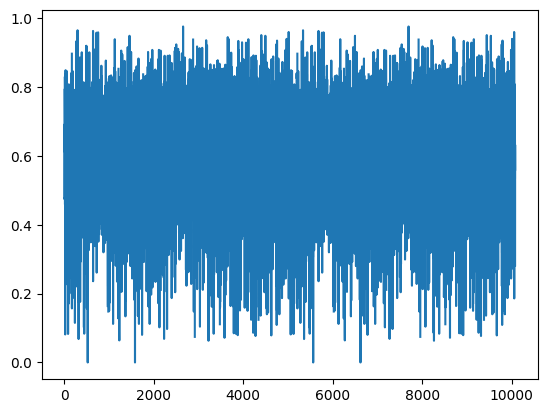

In [45]:
plt.plot(df.danceability)

In [46]:
actual=np.concatenate((np.ones(45),np.zeros(450),np.ones(5)))

In [47]:
predicted=np.concatenate((np.ones(100),np.zeros(400)))

In [48]:
actual

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [49]:
predicted

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

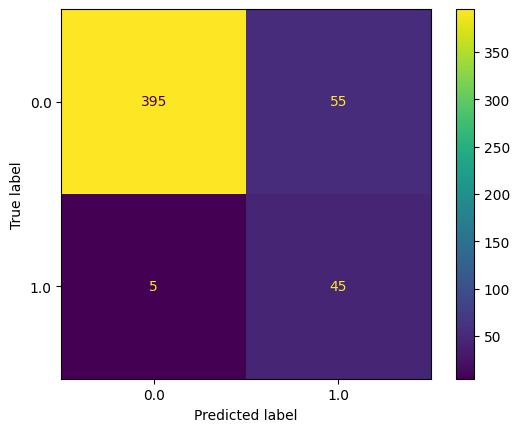

In [51]:
ConfusionMatrixDisplay.from_predictions(actual,predicted)

In [52]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93       450
         1.0       0.45      0.90      0.60        50

    accuracy                           0.88       500
   macro avg       0.72      0.89      0.76       500
weighted avg       0.93      0.88      0.90       500



In [53]:
accuracy_score

<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>